In [1]:
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import evaltools as et, viz_tools
import cmocean as cmo
import datetime as dt
import netCDF4 as nc
import matplotlib.dates as mdates
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm
import cmocean
import pandas as pd
import os
import xarray as xr
import dask

%matplotlib inline

In [2]:
# start and end dates for analysis:
start_date = dt.datetime(2017,1,1)
end_date = dt.datetime(2017,10,17)

# number of days per model file:
flen=10

# dictionary mapping desired model variables to the file types where they are found
filemap={'nitrate':'ptrc_T','silicon':'ptrc_T','ammonium':'ptrc_T','diatoms':'ptrc_T',
         'ciliates':'ptrc_T','flagellates':'ptrc_T'}

# dictionary mapping model file types to their time resolution in hours (1 is hourly files, 24 is daily)
fdict={'ptrc_T':1,'grid_T':1}

# results format
# -- nowcast: files like 01jan15/SalishSea_1h_20150101_20150101_ptrc_T.nc
# -- long: files like SalishSea_1h_20150206_20150804_ptrc_T_20150427-20150506.nc, all in one directory
namfmt='long'


#### NewLOGnSiT

In [ ]:
# path to model files:
PATH= '/data/eolson/results/MEOPAR/SS36runs/CedarRuns/NewLOGnSiT/'

df1=et.loadDFO(datelims=(start_date,end_date),excludeSaanich=False)

data=et.matchData(data=df1,filemap=filemap, fdict=fdict, mod_start=start_date, mod_end=end_date, 
                  mod_nam_fmt=namfmt, mod_basedir=PATH, mod_flen=flen)

data.to_csv(os.path.join(PATH,'DFOmatch.csv'), index=False)

#### NewLOGnSiTB

In [ ]:
# path to model files:
PATH= '/data/eolson/results/MEOPAR/SS36runs/CedarRuns/NewLOGnSiTB/'

df1=et.loadDFO(datelims=(start_date,end_date),excludeSaanich=False)

data=et.matchData(data=df1,filemap=filemap, fdict=fdict, mod_start=start_date, mod_end=end_date, 
                  mod_nam_fmt=namfmt, mod_basedir=PATH, mod_flen=flen)

data.to_csv(os.path.join(PATH,'DFOmatch.csv'), index=False)

In [ ]:
#### NewLONoSiT

In [ ]:
# path to model files:
PATH= '/data/eolson/results/MEOPAR/SS36runs/CedarRuns/NewLONoSiT/'

df1=et.loadDFO(datelims=(start_date,end_date),excludeSaanich=False)

data=et.matchData(data=df1,filemap=filemap, fdict=fdict, mod_start=start_date, mod_end=end_date, 
                  mod_nam_fmt=namfmt, mod_basedir=PATH, mod_flen=flen)

data.to_csv(os.path.join(PATH,'DFOmatch.csv'), index=False)

In [ ]:
#### NewLOSOGT

In [ ]:
# path to model files:
PATH= '/data/eolson/results/MEOPAR/SS36runs/CedarRuns/NewLOSOGT/'

df1=et.loadDFO(datelims=(start_date,end_date),excludeSaanich=False)

data=et.matchData(data=df1,filemap=filemap, fdict=fdict, mod_start=start_date, mod_end=end_date, 
                  mod_nam_fmt=namfmt, mod_basedir=PATH, mod_flen=flen)

data.to_csv(os.path.join(PATH,'DFOmatch.csv'), index=False)

In [ ]:
#### NewLOSOGTbfSi

In [ ]:
# path to model files:
PATH= '/data/eolson/results/MEOPAR/SS36runs/CedarRuns/NewLOSOGTbfSi/'
# dictionary mapping desired model variables to the file types where they are found
filemap={'nitrate':'ptrc_T','silicon':'ptrc_T','diatoms':'ptrc_T',
         'ciliates':'ptrc_T','flagellates':'ptrc_T','votemper':'ptrc_T','vosaline':'ptrc_T'}
df1=et.loadDFO(datelims=(start_date,end_date),excludeSaanich=False)

data=et.matchData(data=df1,filemap=filemap, fdict=fdict, mod_start=start_date, mod_end=end_date, 
                  mod_nam_fmt=namfmt, mod_basedir=PATH, mod_flen=flen)

data.to_csv(os.path.join(PATH,'DFOmatch.csv'), index=False)

In [3]:
# runName: path
archlist=['NewLOGnSiT','NewLOGnSiTB','NewLONoSiT','NewLOSOGT','NewLOSOGTbfSi']
for arch in archlist:
    path=os.path.join('/data/eolson/results/MEOPAR/SS36runs/CedarRuns',arch)
    flist=et.index_model_files(start_date,end_date,path,namfmt,flen,ftype='ptrc_T',tres=1);
    fs=[xr.open_dataset(ii) for ii in flist['paths']]
    # central strait:
    i1=217; j1=520
    fdsi=xr.concat([ii['silicon'].isel(x=i1,y=j1,time_counter=slice(None,None,24)) for ii in fs],"time_counter")
    fbsi=xr.concat([ii['biogenic_silicon'].isel(x=i1,y=j1,time_counter=slice(None,None,24)) for ii in fs],"time_counter")
    with xr.open_dataset(flist['paths'][0]) as ff:
        if 'votemper' in list(ff.keys()):
            fT=xr.concat([ii['votemper'].isel(x=i1,y=j1,time_counter=slice(None,None,24)) for ii in fs],"time_counter")
            ds=xr.merge([fdsi,fbsi,fT],compat="identical")
        else:
            ds=xr.merge([fdsi,fbsi],compat="identical")
    fname=f'profiles_CentralStrait_i{i1}_j{j1}.nc'
    ds.to_netcdf(os.path.join(path,fname))
    # baynes:
    i1=126; j1=603
    fdsi=xr.concat([ii['silicon'].isel(x=i1,y=j1,time_counter=slice(None,None,24)) for ii in fs],"time_counter")
    fbsi=xr.concat([ii['biogenic_silicon'].isel(x=i1,y=j1,time_counter=slice(None,None,24)) for ii in fs],"time_counter")
    with xr.open_dataset(flist['paths'][0]) as ff:
        if 'votemper' in list(ff.keys()):
            fT=xr.concat([ii['votemper'].isel(x=i1,y=j1,time_counter=slice(None,None,24)) for ii in fs],"time_counter")
            ds=xr.merge([fdsi,fbsi,fT],compat="identical")
        else:
            ds=xr.merge([fdsi,fbsi],compat="identical")
    fname=f'profiles_CentralStrait_i{i1}_j{j1}.nc'
    ds.to_netcdf(os.path.join(path,fname))
    

In [4]:
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc') as f:
    bathy=f.variables['Bathymetry'][:,:]

(450.0, 650.0)

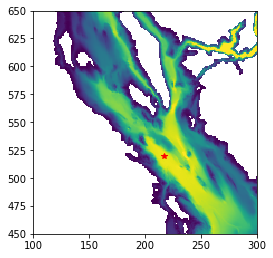

In [5]:
fig,ax=plt.subplots(1,1,figsize=(4,6))
ax.pcolormesh(bathy)
ax.set_aspect(1)
ax.plot(217,520,'r*')
ax.set_xlim(100,300)
ax.set_ylim(450,650)

65.6875

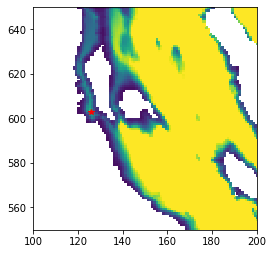

In [6]:
fig,ax=plt.subplots(1,1,figsize=(4,6))
ax.pcolormesh(bathy,vmin=0,vmax=100)
ax.set_aspect(1)
ax.plot(217,520,'r*')
ax.set_xlim(100,200)
ax.set_ylim(550,650)
ax.plot(126,603,'r*')
bathy[603,126]

In [ ]:
test=nc.Dataset('/data/eolson/results/MEOPAR/SS36runs/CedarRuns/NewLOGnSiTB/SalishSea_1h_20170908_20171027_ptrc_T_20171018-20171027.nc')

In [7]:
test=nc.Dataset('/data/eolson/results/MEOPAR/SS36runs/CedarRuns/NewLOGnSiTB/profiles_CentralStrait_i126_j603.nc')

In [8]:
test

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): deptht(40), time_counter(290)
    variables(dimensions): float32 nav_lat(), float32 nav_lon(), float32 deptht(deptht), float64 time_centered(time_counter), int64 time_counter(time_counter), float32 silicon(time_counter, deptht), float32 biogenic_silicon(time_counter, deptht)
    groups: 